In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Load the data

In [23]:
data = pd.read_csv('California_Houses.csv')

# Separate the features and target

In [24]:
X = data.iloc[:, 1:]
y = data.iloc[:, 0]

# Split the data into training, validation, and test sets

In [25]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Scale the features to have zero mean and unit variance

In [26]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Tune the hyperparameter alpha w.r.t mean squared error

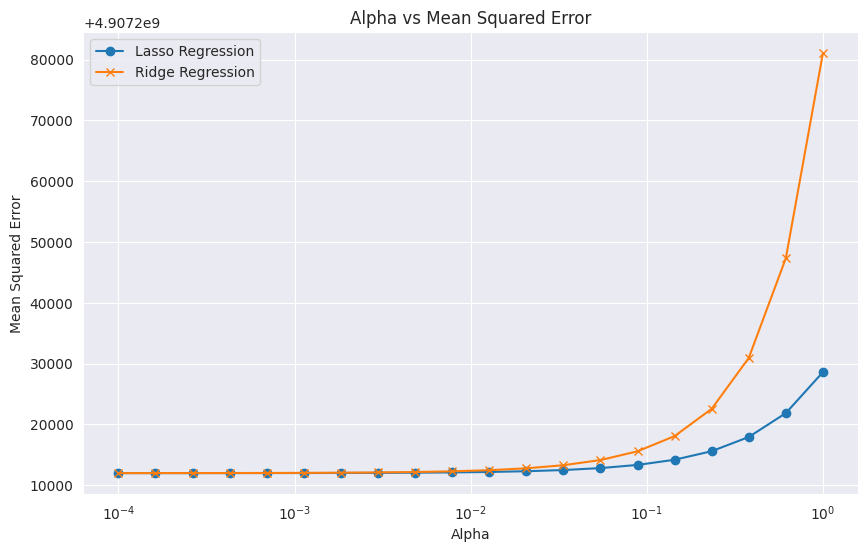

In [27]:


alphas = np.logspace(-4, 0, 20)

mse_lasso = []
mse_ridge = []

for alpha in alphas:
    lasso_model = Lasso(max_iter=10000, alpha=alpha)
    ridge_model = Ridge(max_iter=10000, alpha=alpha)
    
    lasso_model.fit(X_train_scaled, y_train)
    ridge_model.fit(X_train_scaled, y_train)
    
    y_pred_lasso = lasso_model.predict(X_val_scaled)
    y_pred_ridge = ridge_model.predict(X_val_scaled)
    
    mse_lasso.append(mean_squared_error(y_val, y_pred_lasso))
    mse_ridge.append(mean_squared_error(y_val, y_pred_ridge))

plt.figure(figsize=(10, 6))
plt.plot(alphas, mse_lasso, label='Lasso Regression', marker='o')
plt.plot(alphas, mse_ridge, label='Ridge Regression', marker='x')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title('Alpha vs Mean Squared Error')
plt.legend()
plt.show()

# Initialize  the models

In [28]:
linear_model = LinearRegression()
lasso_model = Lasso(max_iter=10000, alpha = 0.01)
ridge_model = Ridge(max_iter=10000, alpha = 0.01)

# Train

In [29]:
linear_model.fit(X_train_scaled, y_train)
lasso_model.fit(X_train_scaled, y_train)
ridge_model.fit(X_train_scaled, y_train)

Ridge(alpha=0.01, max_iter=10000)

# Predict

In [30]:
y_pred_linear = linear_model.predict(X_val_scaled)
y_pred_lasso = lasso_model.predict(X_val_scaled)
y_pred_ridge = ridge_model.predict(X_val_scaled)

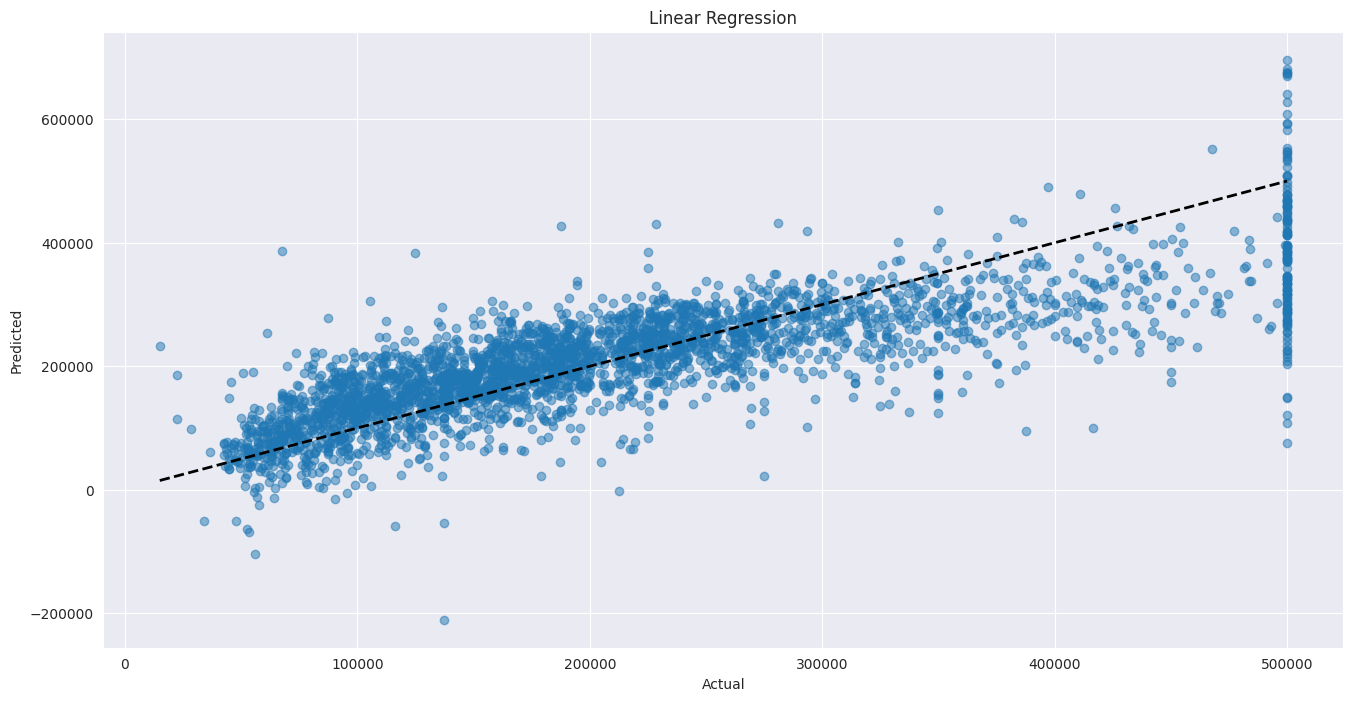

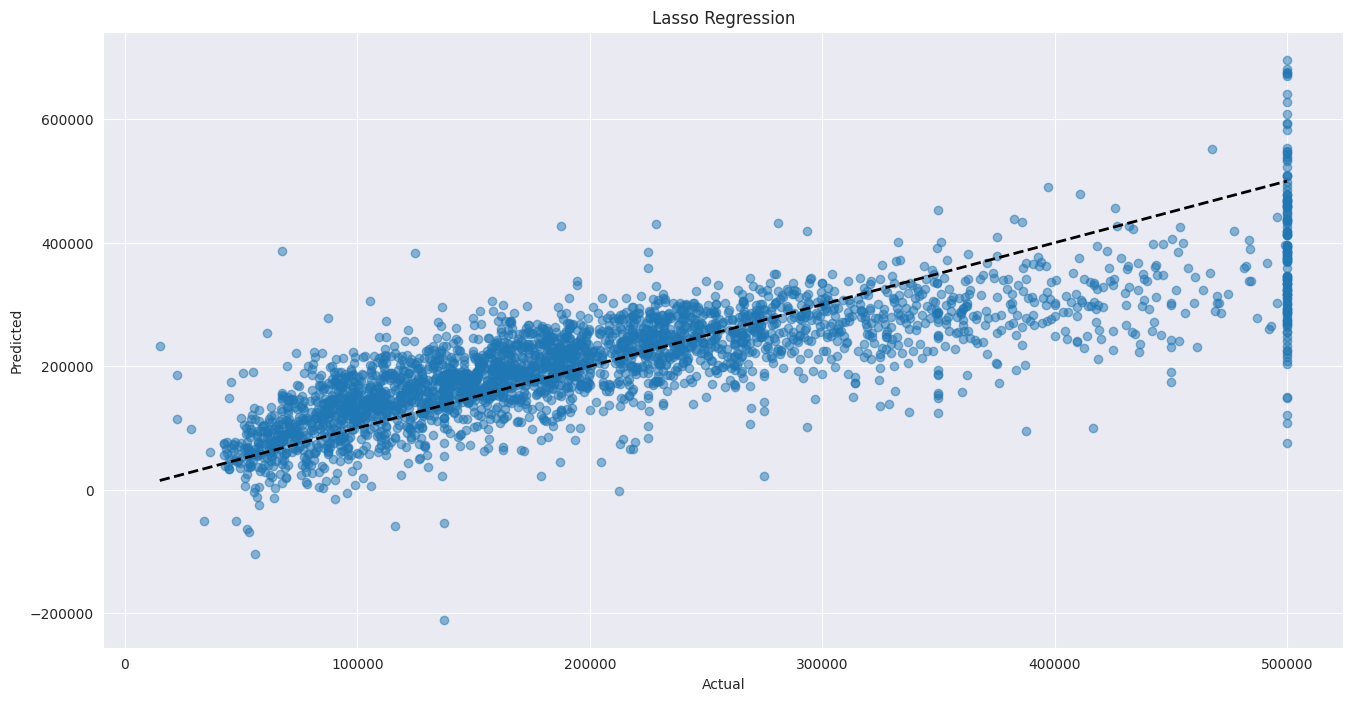

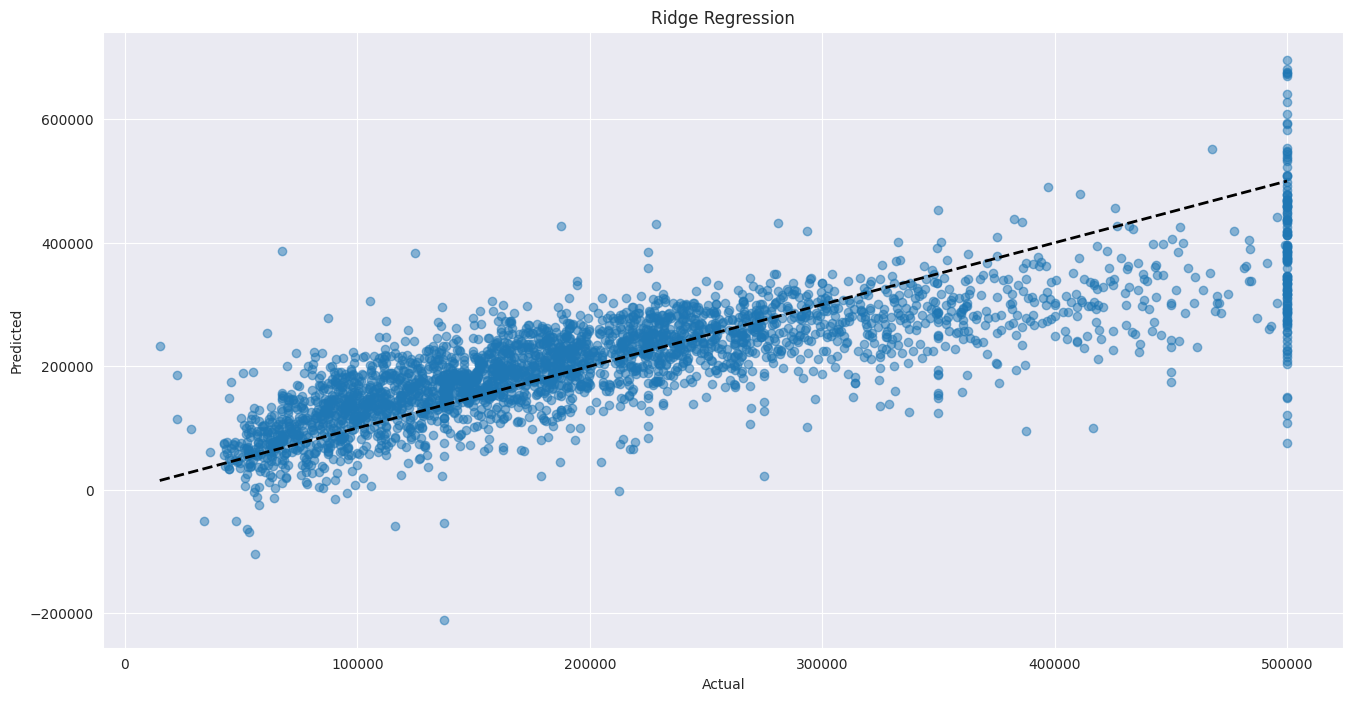

In [31]:
plt.figure(figsize=(16, 8))
plt.scatter(y_val, y_pred_linear, alpha=0.5)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression')
plt.show()

plt.figure(figsize=(16, 8))
plt.scatter(y_val, y_pred_lasso, alpha=0.5)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Lasso Regression')
plt.show()

plt.figure(figsize=(16, 8))
plt.scatter(y_val, y_pred_ridge, alpha=0.5)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Ridge Regression')
plt.show()

# Evaluate Mean Squared Error and Mean Absolute Error

In [32]:
mse_linear = mean_squared_error(y_val, y_pred_linear)
mae_linear = mean_absolute_error(y_val, y_pred_linear)

mse_lasso = mean_squared_error(y_val, y_pred_lasso)
mae_lasso = mean_absolute_error(y_val, y_pred_lasso)

mse_ridge = mean_squared_error(y_val, y_pred_ridge)
mae_ridge = mean_absolute_error(y_val, y_pred_ridge)

In [33]:
results = {
    "Model": ["Linear Regression", "Lasso Regression", "Ridge Regression"],
    "MSE": [mse_linear, mse_lasso, mse_ridge],
    "MAE": [mae_linear, mae_lasso, mae_ridge]
}

results_df = pd.DataFrame(results)
print(results_df)

               Model           MSE           MAE
0  Linear Regression  4.907212e+09  50790.060271
1   Lasso Regression  4.907212e+09  50790.067444
2   Ridge Regression  4.907212e+09  50790.096370


## Comments on the results
- We choose the alpha 0.01 for both Lasso and Ridge regression based on the MSE values as the seemed to be an optimal hyperparameter value as shown in the plot (Alpha vs Mean Squared Error).
- The MSE and MAE values for all three models are very similar, indicating that the choice of regularization (Lasso or Ridge) did not significantly affect the prediction accuracy for this dataset.
-  While Lasso and Ridge regression add complexity through regularization, their performance being similar to linear regression suggests that the dataset may not have benefited much from regularization. 
- We recommend using linear regression for this dataset due to its simplicity and similar performance to Lasso and Ridge regression.
